## Модели регрессии для шоколада

Этот датасет предоставляет исчерпывающую информацию об объёмах продаж шоколада в мире в период с 2022 по 2025 год.

Общий объем продаж: 19,79 млн долларов США по всем регионам и продуктам
Рост по сравнению с прошлым годом: значительный рост на 54,3 % благодаря выдающимся индивидуальным и региональным показателям.
Средний объем продаж: 6030 долларов США за транзакцию.

#### Данные содержат следующие столбцы:
- Менеджер по продажам — имя ответственного менеджера по продажам (например, Мэллори Уэйбер, Деннисон Кросс, Андрия Кимпто)
- Страна — страна клиента/продажи (например, Австралия, Великобритания, Индия, США)
- Продукт — полное название продукта (например, «50% тёмных кусочков», «Нежная шелковистая карамель», «Эклеры с белым шоколадом»)
- Дата — дата транзакции (в формате ГГГГ-ММ-ДД)
- Сумма — сумма продажи в долларах США по сделке ($)
- Отправленные коробки — количество коробок, проданных по сделке

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [185]:
df = pd.read_csv('Chocolate Sales.csv')

In [187]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [189]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)
# убираем доллар и конвертируем во float

In [191]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month 
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [193]:
df = df.drop('Date', axis=1)

In [195]:
# Средняя цена за коробку
df['price_per_box'] = df['Amount'] / df['Boxes Shipped']

In [197]:
# просто энкодим страны
country_encoded = pd.get_dummies(df['Country'], prefix='country', dtype=int)

manager_target_encoding = df.groupby('Sales Person')['Amount'].agg(['mean', 'count']).rename(
    columns={'mean': 'manager_avg_amount', 'count': 'manager_sales_count'}
)

# manager_avg_amount: Средняя сумма продаж менеджера
# manager_sales_count: Количество продаж менеджера

df = df.join(manager_target_encoding, on='Sales Person')
# country_freq — частота встречаемости страны
country_freq = df['Country'].value_counts(normalize=True)
df['country_freq'] = df['Country'].map(country_freq)

# Объединяем все энкодинги
df = pd.concat([df, country_encoded], axis=1)
df = df.drop('Country', axis=1)

In [199]:
df.head()

,Sales Person,Product,Amount,Boxes Shipped,Year,Month,DayOfWeek,price_per_box,manager_avg_amount,manager_sales_count,country_freq,country_Australia,country_Canada,country_India,country_New Zealand,country_UK,country_USA
0,Jehu Rudeforth,Mint Chip Choco,5320.0,180,2022,1,1,29.555556,5492.287054,129,0.162706,0,0,0,0,1,0
1,Van Tuxwell,85% Dark Bars,7896.0,94,2022,8,0,84.000000,6368.791438,153,0.168190,0,0,1,0,0,0
2,Gigi Bohling,Peanut Butter Cubes,4501.0,91,2022,7,3,49.461538,5264.514255,141,0.168190,0,0,1,0,0,0
3,Jan Morforth,Peanut Butter Cubes,12726.0,342,2022,4,2,37.210526,6039.192308,117,0.187386,1,0,0,0,0,0
4,Jehu Rudeforth,Peanut Butter Cubes,13685.0,184,2022,2,3,74.375000,5492.287054,129,0.162706,0,0,0,0,1,0


In [201]:
df.describe()

,Amount,Boxes Shipped,Year,Month,DayOfWeek,price_per_box,manager_avg_amount,manager_sales_count,country_freq,country_Australia,country_Canada,country_India,country_New Zealand,country_UK,country_USA
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,6030.338775,164.666971,2023.000000,4.576782,2.814747,111.340158,6030.338775,133.645338,0.167241,0.187386,0.159963,0.168190,0.158135,0.162706,0.163620
std,4393.980200,124.024736,0.816621,2.315759,1.746278,295.314947,684.759636,17.120129,0.010164,0.390280,0.366628,0.374092,0.364923,0.369153,0.369987
min,7.000000,1.000000,2022.000000,1.000000,0.000000,0.013514,4313.352157,96.000000,0.158135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2521.495000,71.000000,2022.000000,3.000000,1.000000,15.460976,5540.297521,123.000000,0.159963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5225.500000,137.000000,2023.000000,5.000000,3.000000,38.192954,6190.920370,135.000000,0.163620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8556.842500,232.000000,2024.000000,7.000000,4.000000,83.808388,6368.791438,147.000000,0.168190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26170.950000,778.000000,2024.000000,8.000000,6.000000,4692.360000,7481.694222,162.000000,0.187386,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
df['Product'].value_counts()

Product
50% Dark Bites          180
Eclairs                 180
Smooth Sliky Salty      177
White Choc              174
Drinking Coco           168
Spicy Special Slims     162
Organic Choco Syrup     156
After Nines             150
85% Dark Bars           150
Fruit & Nut Bars        150
Milk Bars               147
Peanut Butter Cubes     147
99% Dark & Pure         147
Almond Choco            144
Raspberry Choco         144
Orange Choco            141
Mint Chip Choco         135
Manuka Honey Choco      135
Caramel Stuffed Bars    129
70% Dark Bites          126
Baker's Choco Chips     123
Choco Coated Almonds    117
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

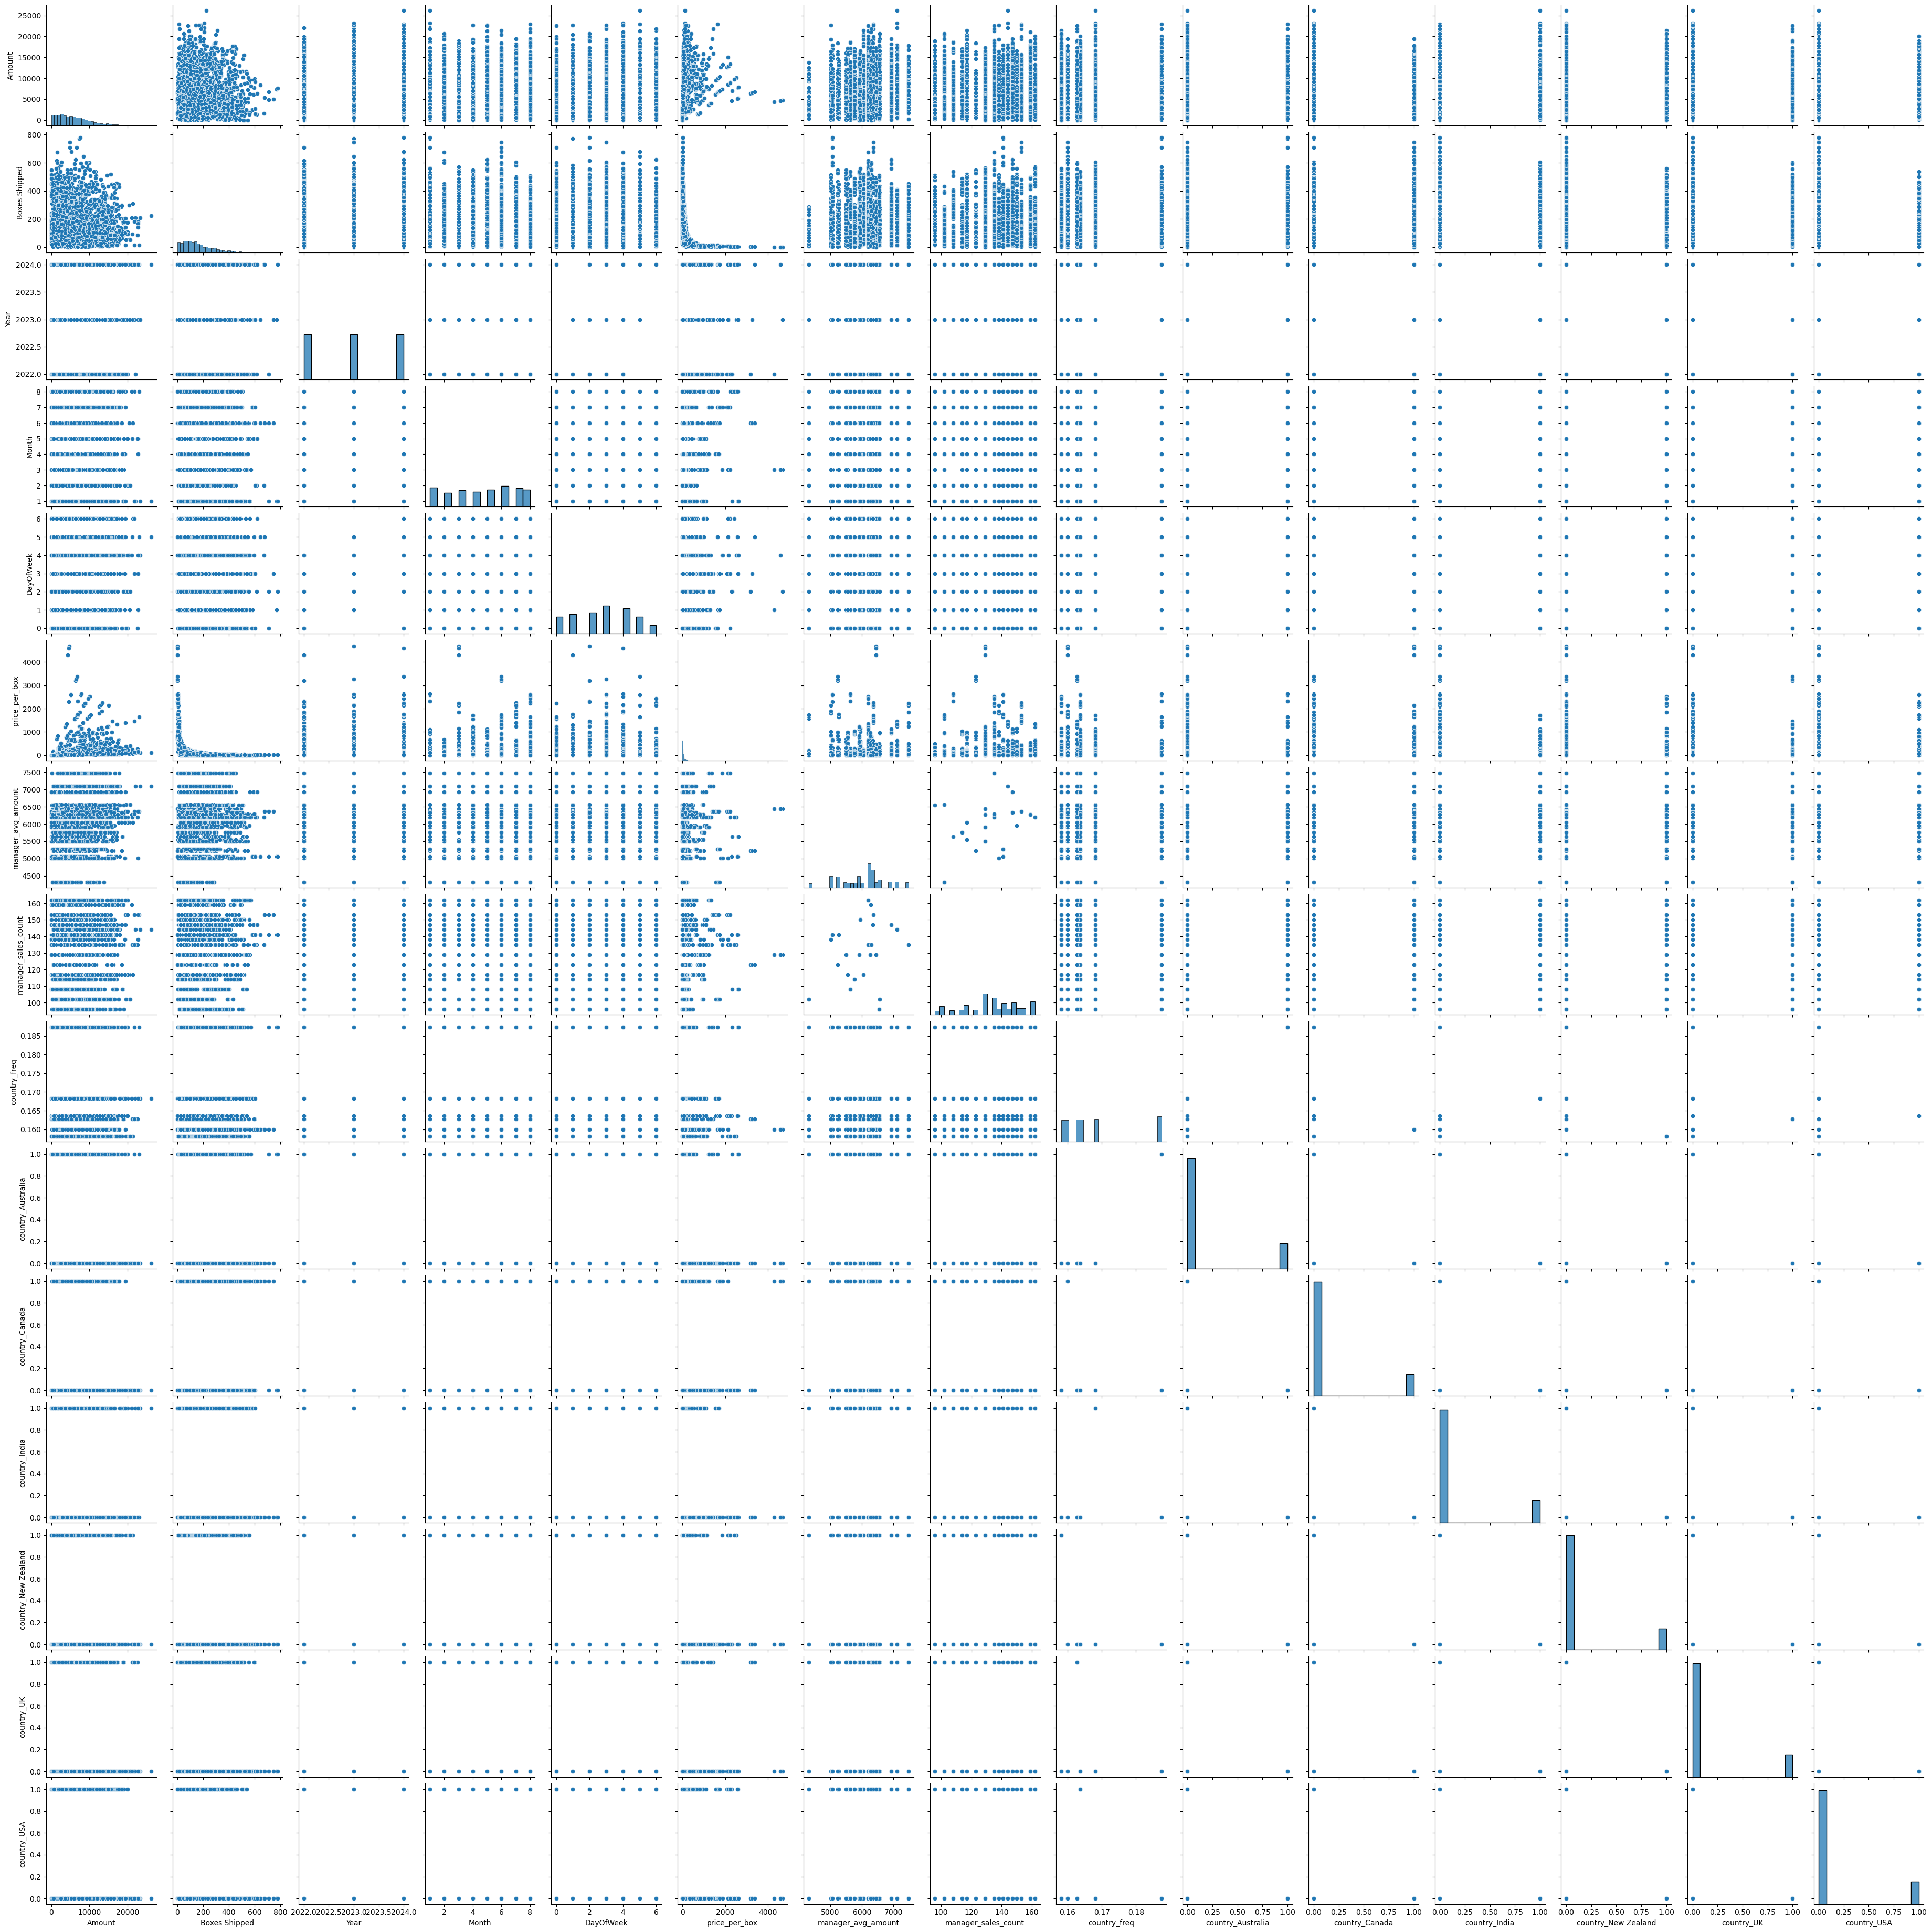

In [205]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

Сильной зависимости не наблюдается ввиду того, что много признаков

<Axes: >

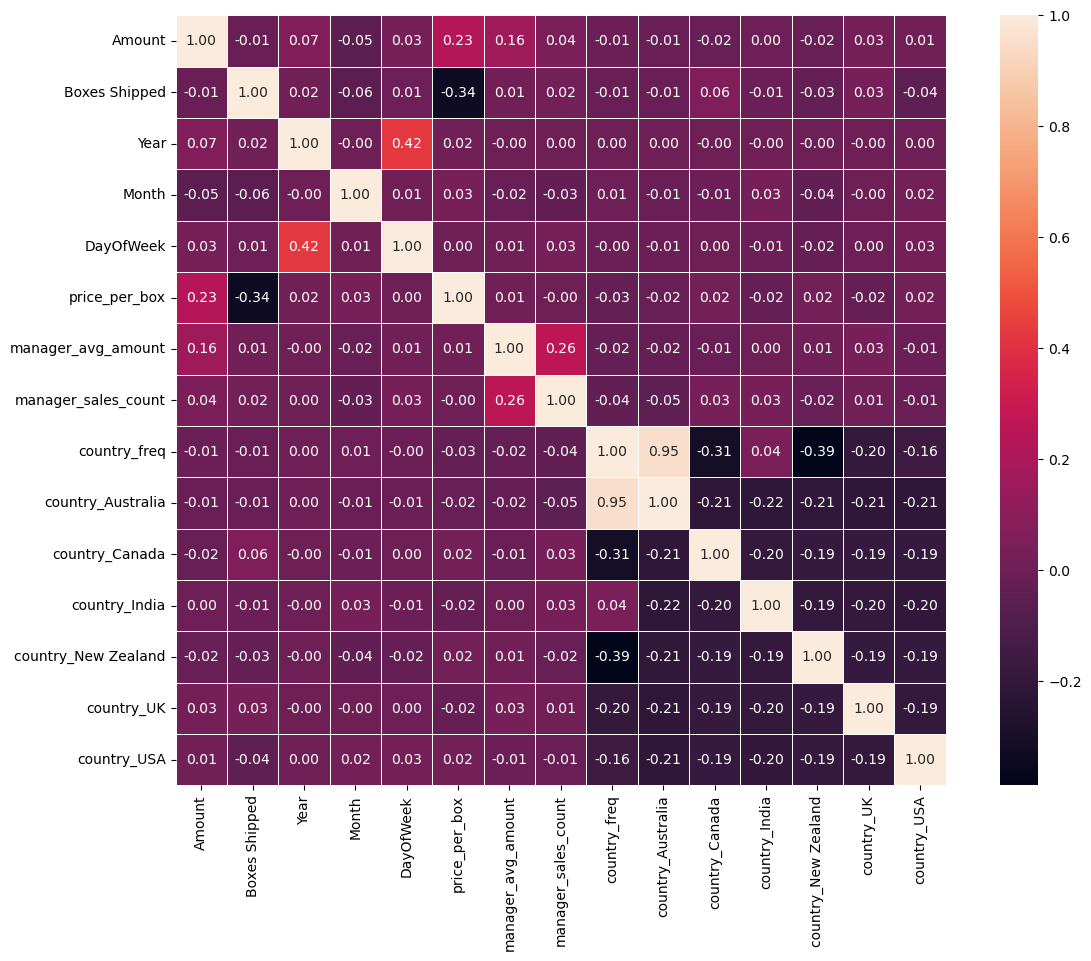

In [223]:
plt.figure(figsize=(14, 10))

# 2. Затем создаем heatmap
sns.heatmap(df[['Amount', 'Boxes Shipped', 'Year', 'Month', 'DayOfWeek', 
                'price_per_box', 'manager_avg_amount', 'manager_sales_count', 
                'country_freq', 'country_Australia', 'country_Canada', 
                'country_India', 'country_New Zealand', 'country_UK', 'country_USA']].corr(), 
            annot=True,  # Показывать числа в ячейках
            fmt='.2f',   # Формат: 2 знака после запятой
            square=True, # Квадратные ячейки
            linewidths=0.5)  # Линии между ячейками

Есть здесь пара признаков которые не плохо коррелируют между собой, больше всего удивляет корреляция между country_Australia и country_freq в 0.95, а также Year и DayOfWeek в 0.42

### Классическая модель

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [413]:
X = df.drop(['Amount', 'Product', 'Sales Person'], axis=1)  
y = df['Amount']

In [415]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [417]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [419]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [421]:
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 регуляризация
    reg_lambda=1,    # L2 регуляризация
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'  # Важно для регрессии!
)

In [423]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [425]:
y_pred = model.predict(X_test)

In [427]:
print("Результаты XGBoost регрессии:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

Результаты XGBoost регрессии:
MAE: 301.47
MSE: 324954.00
RMSE: 570.05
R²: 0.9807


#### XGBRegressor показала себя лучше, с результатом в 0.98
# Основные причины:
1. Табличные данные (структурированные) → XGBoost специализирован на них
2. Относительно небольшой датасет
3. XGBoost лучше обрабатывает нелинейные зависимости в таблицах

## Нейронная модель

In [431]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [433]:
X_train_scaled = scaler_X.transform(X_train)  # Используем уже созданный scaler_X
X_test_scaled = scaler_X.transform(X_test)

In [435]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [437]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), name='input'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, name='output')  # Один выход для регрессии
])


In [439]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1920      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trai

In [441]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [443]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [447]:
history = model.fit(
    X_train_scaled, 
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # 20% тренировочных данных для валидации
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0475 - mae: 0.1529 - val_loss: 0.0547 - val_mae: 0.1702
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0481 - mae: 0.1581 - val_loss: 0.0438 - val_mae: 0.1413
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0443 - mae: 0.1537 - val_loss: 0.0520 - val_mae: 0.1534
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0505 - mae: 0.1584 - val_loss: 0.0420 - val_mae: 0.1461
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0462 - mae: 0.1562 - val_loss: 0.0414 - val_mae: 0.1370
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0462 - mae: 0.1561 - val_loss: 0.0444 - val_mae: 0.1428
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0436 - mae: 0.1505 - val_loss: 0.0379 - val_mae: 0.1256
Epoch 8/100
66/66 [==============================] - 0s 2ms/step - loss: 0.0433 - m

In [451]:
nn_predictions_scaled = model.predict(X_test_scaled).flatten()
nn_predictions = scaler_y.inverse_transform(nn_predictions_scaled.reshape(-1, 1)).flatten()

In [465]:
print("Результаты нейронной модели:")
print(f"MAE: {mean_absolute_error(y_test, nn_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, nn_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, nn_predictions)):.2f}")
print(f"R²: {r2_score(y_test, nn_predictions):.4f}")

Результаты нейронной модели:
MAE: 532.34
MSE: 709417.14
RMSE: 842.27
R²: 0.9578


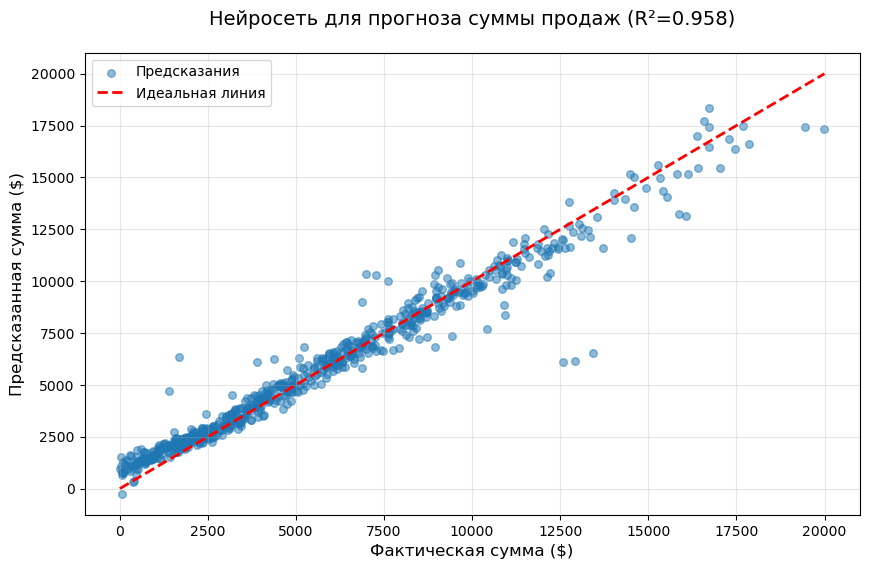

In [463]:
plt.figure(figsize=(10, 6))

# Фактические vs предсказанные значения
plt.scatter(y_test, nn_predictions, alpha=0.5, s=30, label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Идеальная линия')

plt.xlabel('Фактическая сумма ($)', fontsize=12)
plt.ylabel('Предсказанная сумма ($)', fontsize=12)
plt.title(f'Нейросеть для прогноза суммы продаж (R²={r2_score(y_test, nn_predictions):.3f})', 
          fontsize=14, pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

#### Нейросеть показала себя чуть хуже, с результатом в 0.95
# Основные причины:
1. Табличные данные (структурированные) → Нейросеть хуже специализирована на них
2. Относительно небольшой датасет → Нейросетям нужно больше данных
3. Нейросеть хуже обрабатывает нелинейные зависимости в таблицах

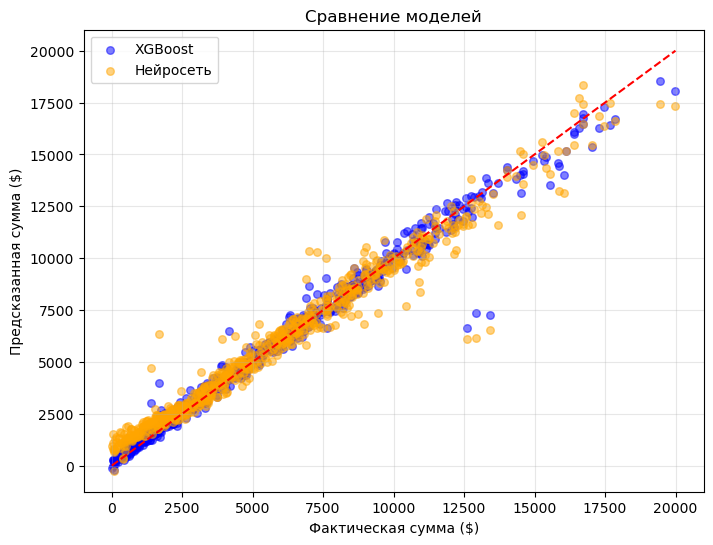

In [481]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=30, color='blue', label='XGBoost')
plt.scatter(y_test, nn_predictions, alpha=0.5, s=30, color='orange', label='Нейросеть')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактическая сумма ($)')
plt.ylabel('Предсказанная сумма ($)')
plt.title('Сравнение моделей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Общий вывод
В целом обе модели показала себя замечательно с результатом свыше 95 процентов, стоило поискать датасет побольше для того чтобы лучше расмотреть нейросеть